<a href="https://colab.research.google.com/github/GRINTKIM/Self-Study-MachineLearing-DeepLearning/blob/master/09_3_LSTM%EA%B3%BC_GRU_%EC%85%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM과 GRU 셀

- 기본 순환층은 긴 시퀀스를 학습하기 어려움
- 시퀀스가 길수록 순환되는 은닉 상태에 담긴 정보가 점차 희석되기 때문
- 따라서 멀리 떨어져 있는 단어 정보를 인식하는 데 어려울 수 있음

## LSTM 구조

- **LSTM** -> Long Short Term Memory
- 말 그대로 단기 기억을 오래 기억하기 위해 고안됨
- LSTM에는 입력과 가중치를 곱하고 절편을 더해 활성화 함수를 통과시키는 구조를 여러개 가지고 있음
- 이런 계산 결과는 다음 타임스텝에 재사용됨

<br>

- 은닉 상태를 만드는 방법
  - 입력과 이전 타임스텝의 은닉 상태를 가중치에 곱한 후 활성화 함수를 통과시켜 다음 은닉 상태를 만듦
  - 기본 순환층과 달리 **시그모이드 활성화 함수** 사용
  - tanh 활성화 함수를 통과한 어떤 값과 곱해져서 은닉 상태를 만듦
- LSTM에는 순환되는 상태가 2개
  - 은닉 상태
  - **셀 상태(cell state)**
    - 다음 층으로 전달되지 않고 LSTM 셀에서 순환만 되는 값

- 셀 상태를 계산하는 과정
  - 입력과 은닉 상태를 또 다른 가중치 $w_f$에 곱하여 새로운 셀 상태를 만듦
  - 이 셀 상태가 tanh 함수를 통과하여 새로운 은닉 상태를 만드는 데 기여
  - 여기에 2개의 작은 셀이 더 추가되어 셀 상태를 만드는 데 기여

<br>

- 삭제 게이트는 셀 상태에 있는 정보를 제거하는 역할
- 입력 게이트는 새로운 정보를 셀 상태에 추가
- 출력 게이트는 이 셀 상태가 다음 은닉 상태로 출력


## LSTM 신경망 훈련하기

In [ ]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)
train_input, val_input, train_target, val_target = train_test_split(train_input,
                                                                    train_target,
                                                                    test_size=0.2,
                                                                    random_state=42)

17464789/17464789 [==============================] - 2s 0us/step


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [ ]:
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8809 (34.41 KB)
Trainable params: 8809 (34.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)

model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 15s 22ms/step - loss: 0.6924 - accuracy: 0.5455 - val_loss: 0.6918 - val_accuracy: 0.5608
Epoch 2/100
 15/313 [>.............................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5740

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 5s 15ms/step - loss: 0.6899 - accuracy: 0.6068 - val_loss: 0.6875 - val_accuracy: 0.6452
Epoch 3/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6786 - accuracy: 0.6585 - val_loss: 0.6595 - val_accuracy: 0.6808
Epoch 4/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6278 - accuracy: 0.6915 - val_loss: 0.6085 - val_accuracy: 0.6920
Epoch 5/100
313/313 [==============================] - 3s 8ms/step - loss: 0.5936 - accuracy: 0.7123 - val_loss: 0.5856 - val_accuracy: 0.7122
Epoch 6/100
313/313 [==============================] - 3s 10ms/step - loss: 0.5709 - accuracy: 0.7287 - val_loss: 0.5657 - val_accuracy: 0.7270
Epoch 7/100
313/313 [==============================] - 3s 11ms/step - loss: 0.5500 - accuracy: 0.7438 - val_loss: 0.5466 - val_accuracy: 0.7430
Epoch 8/100
313/313 [==============================] - 3s 8ms/step - loss: 0.5314 - accuracy: 0.7582 - val_loss: 0.5306 - val_accuracy: 0.7552
Epoch 9/

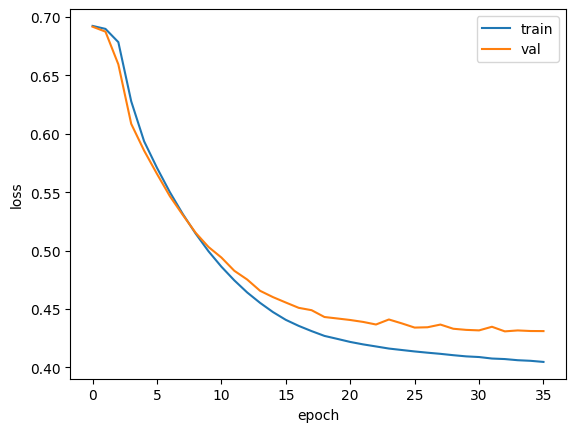

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 순환층에 드롭아웃 적용하기

In [ ]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_1 (LSTM)               (None, 8)                 800       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8809 (34.41 KB)
Trainable params: 8809 (34.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)

model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 10s 21ms/step - loss: 0.6928 - accuracy: 0.5290 - val_loss: 0.6927 - val_accuracy: 0.5396
Epoch 2/100
 12/313 [>.............................] - ETA: 3s - loss: 0.6927 - accuracy: 0.5286

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 3s 9ms/step - loss: 0.6921 - accuracy: 0.5579 - val_loss: 0.6918 - val_accuracy: 0.5558
Epoch 3/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6905 - accuracy: 0.5864 - val_loss: 0.6896 - val_accuracy: 0.5930
Epoch 4/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6864 - accuracy: 0.6146 - val_loss: 0.6823 - val_accuracy: 0.6592
Epoch 5/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6673 - accuracy: 0.6816 - val_loss: 0.6435 - val_accuracy: 0.6980
Epoch 6/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6250 - accuracy: 0.6938 - val_loss: 0.6140 - val_accuracy: 0.6950
Epoch 7/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6040 - accuracy: 0.7073 - val_loss: 0.5946 - val_accuracy: 0.7154
Epoch 8/100
313/313 [==============================] - 3s 8ms/step - loss: 0.5847 - accuracy: 0.7246 - val_loss: 0.5742 - val_accuracy: 0.7312
Epoch 9/10

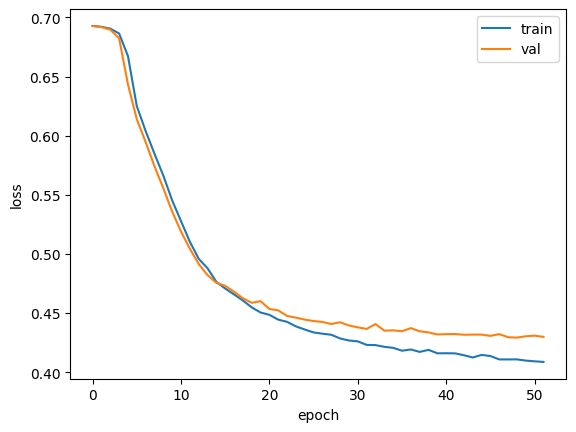

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 2개의 층을 연결하기

In [ ]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9353 (36.54 KB)
Trainable params: 9353 (36.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)

model3.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 12s 21ms/step - loss: 0.6928 - accuracy: 0.5224 - val_loss: 0.6926 - val_accuracy: 0.4972
Epoch 2/100
 11/313 [>.............................] - ETA: 3s - loss: 0.6921 - accuracy: 0.5298

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 6s 18ms/step - loss: 0.6917 - accuracy: 0.5457 - val_loss: 0.6909 - val_accuracy: 0.5700
Epoch 3/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6873 - accuracy: 0.6167 - val_loss: 0.6820 - val_accuracy: 0.6208
Epoch 4/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6579 - accuracy: 0.6593 - val_loss: 0.6211 - val_accuracy: 0.6938
Epoch 5/100
313/313 [==============================] - 4s 12ms/step - loss: 0.5957 - accuracy: 0.7013 - val_loss: 0.5718 - val_accuracy: 0.7202
Epoch 6/100
313/313 [==============================] - 5s 16ms/step - loss: 0.5598 - accuracy: 0.7226 - val_loss: 0.5406 - val_accuracy: 0.7324
Epoch 7/100
313/313 [==============================] - 4s 12ms/step - loss: 0.5345 - accuracy: 0.7403 - val_loss: 0.5181 - val_accuracy: 0.7480
Epoch 8/100
313/313 [==============================] - 4s 14ms/step - loss: 0.5125 - accuracy: 0.7563 - val_loss: 0.4986 - val_accuracy: 0.7636
Epoc

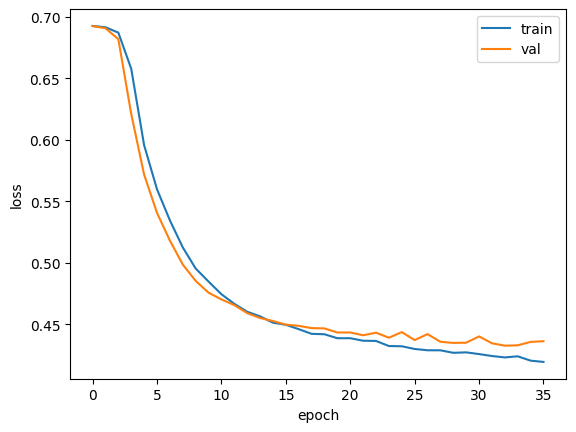

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## GRU 구조

- **GRU** -> Gated Recurrent Unit
- LSTM을 간소화한 버전으로 생각할 수 있음
- LSTM처럼 셀 상태를 계산하지 않고 은닉 상태 하나만 포함하고 있음

## GRU 신경망 훈련하기

In [ ]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8633 (33.72 KB)
Trainable params: 8633 (33.72 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)

model4.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 9s 21ms/step - loss: 0.6927 - accuracy: 0.5185 - val_loss: 0.6923 - val_accuracy: 0.5542
Epoch 2/100
 16/313 [>.............................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5898

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 4s 12ms/step - loss: 0.6915 - accuracy: 0.5709 - val_loss: 0.6911 - val_accuracy: 0.5648
Epoch 3/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6895 - accuracy: 0.5918 - val_loss: 0.6887 - val_accuracy: 0.5934
Epoch 4/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6860 - accuracy: 0.6108 - val_loss: 0.6843 - val_accuracy: 0.6020
Epoch 5/100
313/313 [==============================] - 5s 17ms/step - loss: 0.6795 - accuracy: 0.6222 - val_loss: 0.6760 - val_accuracy: 0.6198
Epoch 6/100
313/313 [==============================] - 3s 10ms/step - loss: 0.6668 - accuracy: 0.6428 - val_loss: 0.6597 - val_accuracy: 0.6468
Epoch 7/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6393 - accuracy: 0.6687 - val_loss: 0.6193 - val_accuracy: 0.6900
Epoch 8/100
313/313 [==============================] - 2s 8ms/step - loss: 0.5725 - accuracy: 0.7143 - val_loss: 0.5483 - val_accuracy: 0.7330
Epoch 9/

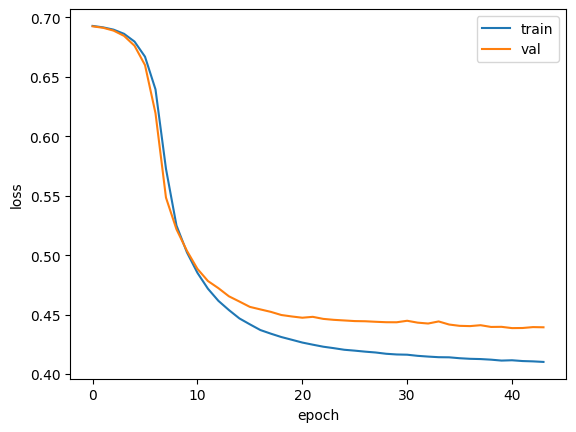

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## LSTM과 GRU 셀로 훈련

In [ ]:
test_seq = pad_sequences(test_input, maxlen=100)
rnn_model = keras.models.load_model('best-2rnn-model.h5')
rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 6s 7ms/step - loss: 0.4279 - accuracy: 0.7995


[0.4278782308101654, 0.7994800209999084]